<a href="https://colab.research.google.com/github/zfukuoka/Training-KikaiGakusyuZukan/blob/master/Chap2_09_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第２章教師あり学習

## 09 kNN(k-Nearest Neighbor method, k近傍法)

ポイント

* 基準点に対して、k個の近傍点でどちらの分類に属するかを多数決でとって境界線を決めるケース
  * 多数決なので、決するようにkは奇数を用いる
  * 多数決なので、明確に分類できないような場所があってもどちらかに分けれる特徴を持つ
  * kの個数を多くすると、明確に分類できないところが入り乱れて、それはそれであまり精度が良くない結果を得られるケースがある

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データ生成
X, y = make_moons(noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8333333333333334

上記の通り、サンプルコードでは学習させたあと、テストデータの正解率を求めるところまでで終わっている。
これではわからないので、データの可視化（手法はSVMと同じメッシュのデータを作って、予測結果を組み合わせて等高線を表示する手法）を行った。

また、テキストでは近傍点のkを1,5,30の事例があったので、同様に行った。
なお、近傍点が5が KNeighborsClassifier のデフォルト値で、サンプルコードはデフォルトの結果である。

後述のプロットをみると、下記の事がプロットから確認できる。
* 近傍点が1では飛び地の島ができており、デフォルトの近傍点5に比べ、テストデータの正解率が低い
* 近傍点が30では飛び地はないが、プロットした学習用のところでも既にずれているところが多く、正解率はテストデータがデフォルトの近傍点5よりも低い

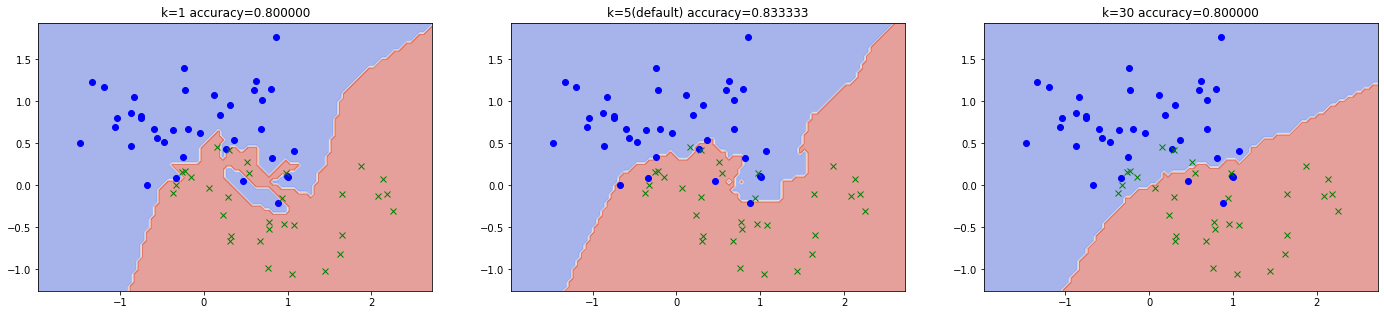

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 可視化用のメッシュデータ作成
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 0.5, x.max() + 0.5
  y_min, y_max = y.min() - 0.2, y.max() + 0.2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

mesh_x, mesh_y = make_meshgrid(X_train[0:,0], X_train[0:,1], h=0.05)

# トレーニングデータの分類
yy = np.array(y_train)
y0 = np.where(yy==0)
y1 = np.where(yy==1)

# 近傍点を変えた場合の事例
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
model30 = KNeighborsClassifier(n_neighbors=30)
model30.fit(X_train, y_train)
y_pred30 = model1.predict(X_test)

mesh_z = model.predict(np.c_[mesh_x.ravel(), mesh_y.ravel()])
mesh_z1 = model1.predict(np.c_[mesh_x.ravel(), mesh_y.ravel()])
mesh_z30 = model30.predict(np.c_[mesh_x.ravel(), mesh_y.ravel()])


# プロット
fig = plt.figure(figsize=(24, 18))
ax1 = fig.add_subplot(131, aspect='equal')
ax1.plot(X_train[y0,0], X_train[y0,1], "bo")
ax1.plot(X_train[y1,0], X_train[y1,1], "gx")
ax1.contourf(
    mesh_x, mesh_y, mesh_z1.reshape(mesh_x.shape),
    cmap=plt.cm.coolwarm, alpha=0.5, zorder=-10)
ax1.set_title("k=1 accuracy=%f" % accuracy_score(y_pred1, y_test))
ax5 = fig.add_subplot(132, aspect='equal')
ax5.plot(X_train[y0,0], X_train[y0,1], "bo")
ax5.plot(X_train[y1,0], X_train[y1,1], "gx")
ax5.contourf(
    mesh_x, mesh_y, mesh_z.reshape(mesh_x.shape),
    cmap=plt.cm.coolwarm, alpha=0.5, zorder=-10)
ax5.set_title("k=5(default) accuracy=%f" % accuracy_score(y_pred, y_test))
ax30 = fig.add_subplot(133, aspect='equal')
ax30.plot(X_train[y0,0], X_train[y0,1], "bo")
ax30.plot(X_train[y1,0], X_train[y1,1], "gx")
ax30.contourf(
    mesh_x, mesh_y, mesh_z30.reshape(mesh_x.shape),
    cmap=plt.cm.coolwarm, alpha=0.5, zorder=-10)
ax30.set_title("k=30 accuracy=%f" % accuracy_score(y_pred30, y_test))

plt.show()